In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/crime.csv')
data.head()

,state,abbr,low,murder,tc2009
0,Alabama,AL,-27,7.1,4337.5
1,Alaska,AK,-80,3.2,3567.1
2,Arizona,AZ,-40,5.5,3725.2
3,Arkansas,AR,-29,6.3,4415.4
4,California,CA,-45,5.4,3201.6


In [14]:
X=data.iloc[:,2:]
Y=data.iloc[:,:2]
Y

,state,abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [7]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

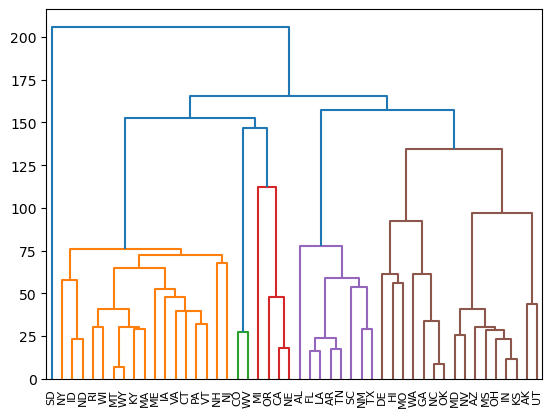

In [22]:
z=sch.linkage(X)
sch.dendrogram(z,labels=data.abbr.values)
plt.show()

In [30]:
heir=AgglomerativeClustering(6)
heir.fit(X)

AgglomerativeClustering(n_clusters=6)

In [31]:
clust=heir.fit_predict(X)
clust

array([4, 3, 3, 4, 5, 0, 0, 2, 4, 2, 2, 1, 3, 0, 3, 0, 4, 0, 3, 0, 5, 3,
       2, 0, 5, 3, 1, 1, 4, 1, 2, 1, 3, 2, 5, 0, 0, 4, 1, 4, 4, 3, 0, 0,
       2, 0, 0, 0], dtype=int64)

In [37]:
#
Y['cluster']=clust
Y.head()

,state,abbr,cluster
0,Alabama,AL,4
1,Alaska,AK,3
2,Arizona,AZ,3
3,Arkansas,AR,4
4,California,CA,5


In [39]:
# getting aggregate mean of each cluster
crime_data.iloc[:,].groupby(cluster_labels).median()

ValueError: Grouper and axis must be same length

In [44]:
data['cl']=clust

In [54]:
data.iloc[:,:-1].groupby(clust).mean()

,low,murder,tc2009
0,-45.357143,3.114286,2775.614286
1,-51.833333,2.616667,2277.733333
2,-24.428571,4.814286,4059.842857
3,-45.888889,5.066667,3671.311111
4,-24.750000,7.587500,4459.750000
5,-49.250000,4.125000,3248.675000
